# Algorito Genético para Predecir Contagios por COVID-19 (1er Ola)

Importamos la librería necesaria para leer archivos en formato **.csv**.

# Aproximación con Curva Log-normal

$$f(x;A,\mu,\sigma^2)=A\cdot\frac{1}{x}e^{-\frac{(\ln{x}-\mu)^2}{2\sigma^2}}$$

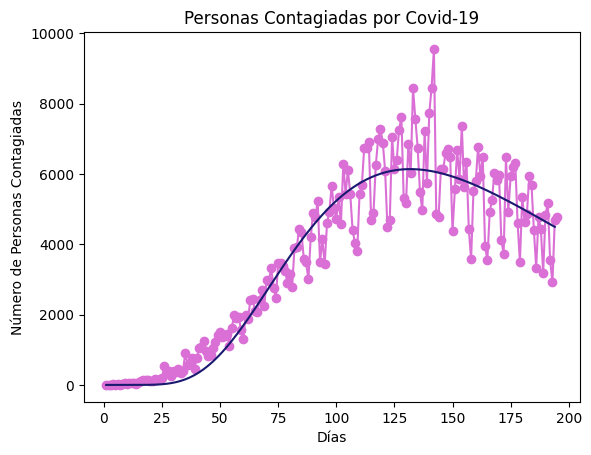

912021.2431162689 5.121239439330062 0.4899695205430182


In [8]:
# Importamos las librerias necesarias
from numpy import arange
import numpy as np
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
import matplotlib.pyplot as plt

from math import log, log10, exp, e, pow, sqrt, pi
import math
import statistics

# Defino la función objetivo
def objective(x, A, mu, sigma):
 return A*(1/x)*(np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)))

# Cargo la base de datos
dataframe = read_csv('casos_diarios_2.csv', header=None)
data = dataframe.values

# Elijo los valores del ejes x y del eje y
x = []
y = []
for line in open('casos_diarios_2.csv', 'r'):
    lines = [i for i in line.split()]
    x.append(int(lines[0]))
    y.append(int(lines[1]))

popt, _ = curve_fit(objective, x, y, p0=[8000,4.8,1])
# Defino los parametros a traves de la función anterior
A, mu, sigma = popt
# Graficamos los datos color 'Orchid'
plt.plot(x, y, marker = 'o', c = 'Orchid')
# Define el dominio para la función aproximadora log-normal
x_line = arange(min(x), max(x), 1)
# Calcula la imagen para la función aproximadora log-normal
y_line = objective(x_line, A, mu, sigma)
# Graficamos la curva log-normal color 'MidnightBlue'
pyplot.plot(x_line, y_line, color='MidnightBlue')
plt.title("Personas Contagiadas por Covid-19")
plt.xlabel('Días')
plt.ylabel('Número de Personas Contagiadas')
pyplot.show()
print(A,mu,sigma)

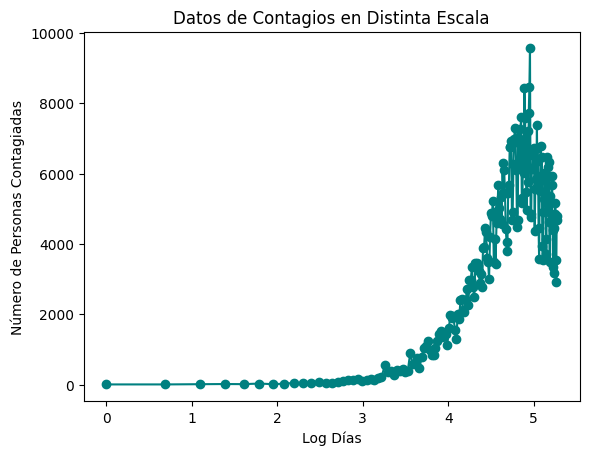

In [9]:
# Normalizar los datos anteriores
x_alt = []
y_alt = []
for line in open('casos_diarios_2.csv', 'r'):
    lines = [i for i in line.split()]
    x_alt.append(np.log(int(lines[0])))
    y_alt.append(int(lines[1]))

plt.plot(x_alt, y_alt, marker = 'o', c = 'teal')
plt.title("Datos de Contagios en Distinta Escala")
plt.xlabel('Log Días')
plt.ylabel('Número de Personas Contagiadas')
pyplot.show()